# Anomaly Detection Exercise: Credit Card Fraud

In this exercise, we will practice using the Local Outlier Factor and Isolation Forest methods to detect outliers in data sets. We will be looking at data from a selected subset of the data for the ["Credit Card Fraud Detection" Kaggle task](https://www.kaggle.com/mlg-ulb/creditcardfraud/data).

**Questions:**

**Question 1**:

  - Load the data in *creditcard_10k.csv.gz* into a Pandas dataframe *df* and examine the data with *df.describe()*. 
  - Explain the mean and std values for the different features based on the meaning of the features (hint: see the Kaggle task description).

In [4]:
# your code here

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer



In [5]:
df = pd.read_csv('creditcard_10k.csv.gz', compression='gzip')
df.describe()


Time            V1            V2            V3            V4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    5966.033400     -0.241862      0.281949      0.906270      0.264148   
std     4473.403739      1.521679      1.308139      1.159154      1.441235   
min        0.000000    -27.670569    -34.607649    -15.496222     -4.657545   
25%     2072.750000     -1.013283     -0.208342      0.412799     -0.614424   
50%     4563.500000     -0.372799      0.288524      0.944361      0.219861   
75%    10233.250000      1.150864      0.901879      1.602903      1.125666   
max    15012.000000      1.960497      8.636214      4.101716     10.463020   

                 V5            V6            V7            V8            V9  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -0.046398      0.133108     -0.071689     -0.064778      0.802224   
std        1.182935      1.307311      1.077430      1.259064      1.155198   
min      -32.092129    -23.496714    -26.548144    -23.632502     -6.329801   
25%       -0.643390     -0.629934     -0.542336     -0.190747      0.070868   
50%       -0.152769     -0.152566     -0.055585      0.012865      0.805275   
75%        0.371081      0.505357      0.476280      0.274533      1.506299   
max       34.099309     21.393069     34.303177      5.060381     10.392889   

       ...           V21           V22           V23           V24  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...     -0.051990     -0.152671     -0.033268      0.021335   
std    ...      0.913811      0.631083      0.487814      0.594430   
min    ...    -11.468435     -8.527145    -15.144340     -2.512377   
25%    ...     -0.268120     -0.549638     -0.174120     -0.327817   
50%    ...     -0.123273     -0.136746     -0.045794      0.079976   
75%    ...      0.032707      0.247490      0.081665      0.410877   
max    ...     22.588989      4.534454     13.876221      3.200201   

                V25           V26           V27           V28        Amount  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.087146      0.108140      0.005518      0.002915     63.030188   
std        0.428171      0.562793      0.410868      0.266247    184.486158   
min       -2.577363     -1.338556     -7.976100     -3.509250      0.000000   
25%       -0.158137     -0.327974     -0.084489     -0.015753      5.000000   
50%        0.121001      0.042865     -0.004568      0.015897     15.950000   
75%        0.359058      0.476394      0.120811      0.077182     50.960000   
max        5.525093      3.517346      8.254376      4.860769   7712.430000   

             Class  
count  10000.00000  
mean       0.00380  
std        0.06153  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        0.00000  
max        1.00000  

[8 rows x 31 columns]

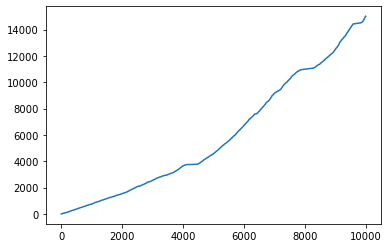

In [6]:
df.Time.plot()

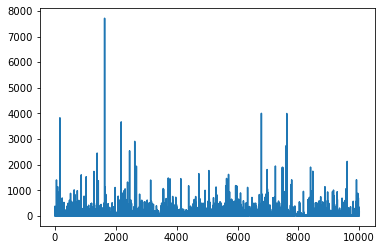

In [7]:
df.Amount.plot()

''

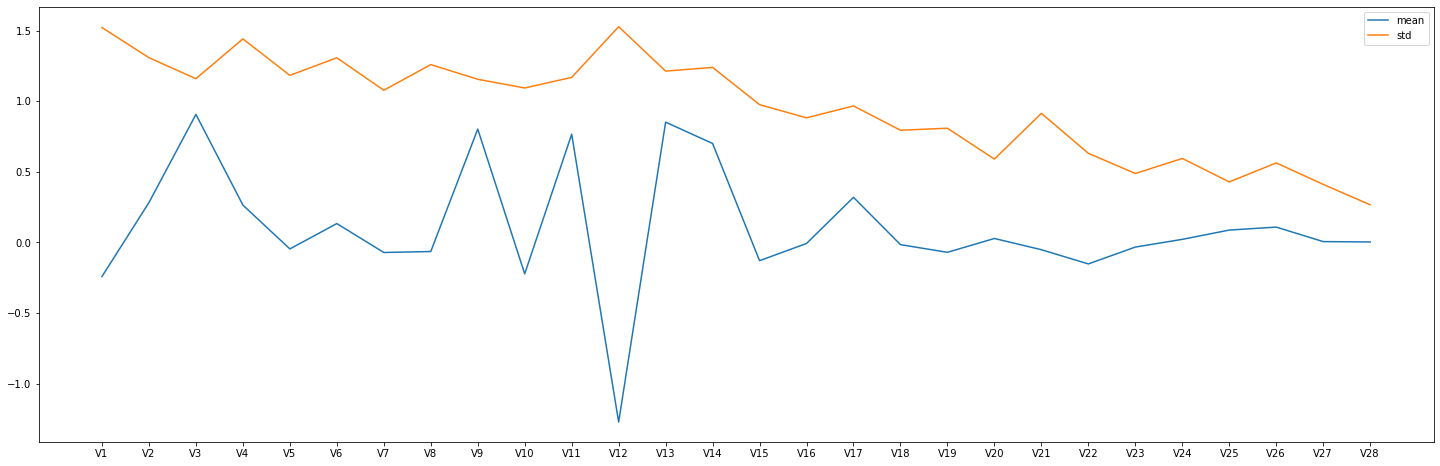

In [8]:
pca_describe = df.describe().loc[['mean', 'std']].transpose().drop(['Time', 'Amount', 'Class'])
plt.figure(figsize=(25, 8))
plt.plot(pca_describe['mean'], label='mean')
plt.plot(pca_describe['std'], label='std')
plt.legend()
plt.rc('font', size=20)
;

Features 
Time, Amount, Class, V1 through V28 

Features V1 ~ V28 are the principal components obtained from the PCA analysis. The original data is not provided. The mean of the PCA components provide a reference point for interpreting the principal componenets. Each principal components is a linear combination of the original variables and the coefficient of these linear combinatins determine the direction and magnitude of the principal componenent. 

Std of the principal components provide the dispersion of principal components across all observations
A large std indicates that the values of the principal components vary widely accross the observations and vice versa. 

Typically, PC with largest std are considered to be the most important. 


**Question 2**:

Split the data into `X` and `y` (`Class` column of the `df`).  

We will use **unsupervised** Anomaly Detection algorithms to find the outliers, and use the `Class` feature that tells whether the transaction is legitimate or fraudulent only as target labels for **metric** to check how well we were able to recognize the outliers.

In [9]:
# your code here

TARGET = 'Class'

X = df.drop(TARGET, axis=1)
y = df[TARGET]

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [11]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Class
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


**Question 3:**

We will be using and comparing behavior of 2 Anomaly Detection algorithms: Local Outlier Factor and Isolation Forest.   
   - Which one of them is based on distance?  
   - What preprocessing is required for distance-based algorithms?
   - Perform the preprocessing on all features


Local Outlier Factor considers the density of a sample with respect to its k-nearest neighbours. A sample that has a significantly lower density than its neighbors is considered an anomaly. 

Isolation forest on the other hand isolates an observation by randomly selecting a feature and then randomly slecting a split value between the max and min of the selected feature. 

- So, Local Outlier Factor algorithm is based on distance.
- Required Preprcessing steps are as follows. 
normalizing, removing outtliers, reducing the dimensionalty, convert all categorical to numerical values. 


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  float64
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

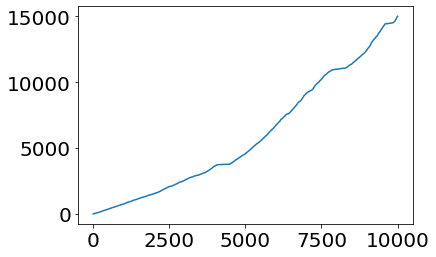

In [13]:
# Removing Time Feature: 
df.Time.plot()

Feature 'Time' is of no use to our model. It has a ID-like behaviour. Removing the feature. 

In [14]:
X = X.drop(['Time'], axis=1)
X.shape

(10000, 29)

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(X)

print(scaled_X)
print(scaled_X.shape)

[[8.87945180e-01 7.98607364e-01 9.20125810e-01 ... 4.99656232e-01
  4.16749000e-01 1.93998519e-02]
 [9.74059675e-01 8.06445052e-01 7.99201527e-01 ... 4.90873897e-01
  4.21023449e-01 3.48787607e-04]
 [8.87994219e-01 7.69299578e-01 8.81186132e-01 ... 4.88016945e-01
  4.12125499e-01 4.90973662e-02]
 ...
 [9.01042025e-01 8.17509620e-01 9.09842850e-01 ... 4.84780951e-01
  4.23000453e-01 5.25126322e-04]
 [8.82212737e-01 8.34419405e-01 8.67634428e-01 ... 4.80966216e-01
  4.20201697e-01 5.25126322e-04]
 [8.93955293e-01 8.34636652e-01 8.90651714e-01 ... 4.82636372e-01
  4.22627324e-01 2.06523755e-02]]
(10000, 29)


**Question 4:** What percentage of transactions in the dataset are fraudulent using the `Class` feature?

In [16]:
# your code here
print(y.value_counts(normalize=True)[1]*100, '%')


0.38 %


**Question 5:**

Use `sklearn.neighbors.LocalOutlierFactor` with default parameters to detect outliers in transaction details.  How many transactions and what percentage of transactions are called fraudulent (outliers) with default parameters of LocalOutlierFactor?

In [17]:
# your code here
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
outlier_scores = lof.fit_predict(scaled_X)

print(outlier_scores)
print(pd.DataFrame(outlier_scores).value_counts()[-1])
lof_percent = (round(pd.DataFrame(outlier_scores).value_counts(normalize=True)[-1]*100,2), "%")
print(lof_percent)

[1 1 1 ... 1 1 1]
655
(6.55, '%')


**Question 6:**

- Use `sklearn.metrics.confusion_matrix` and `sklearn.metrics.classification_report` to compare the results from unsupervised anomaly detection with LOF of previous question with the target labels. 

In [18]:
# your code here


from sklearn.metrics import confusion_matrix, classification_report

y_true = y.values
y_pred = outlier_scores

#converting the outlier scores to class labels . Fraud =1 and non-fraud =0
y_pred = [0 if x == 1 else 1 for x in y_pred]

# calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# calculate the classification report
cr = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(cr)

Confusion Matrix:
[[9313  649]
 [  32    6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9962
           1       0.01      0.16      0.02        38

    accuracy                           0.93     10000
   macro avg       0.50      0.55      0.49     10000
weighted avg       0.99      0.93      0.96     10000



- Is the output of LOF with default parameters better than randomly selecting same number of transactions as were chosen by LOF in previous question? Why or why not? (Hint: if we would randomly select X% of observations as outliers, what percentage of real outliers would be chosen?)

Q4 -  0.38 %   (Random)
Q5 -  6.55 %   (LOF) 

LOF methodolgy is better. 

LOF is a density-based outlier detection method which calculated the outlier score for each sample. (score: maesaue of how isolated each sample is). High outlier score are considered as  outliers. 


And on the other hand, the percentage of real outliers that would be chosen would depend on the proportion of real outliers in the dataset and size of sample. And if the number of outliers are few, percentage of real outliers chosen will be low, which means poor model. 

Also, random selection of outliers, does not consider any underlying pattern or density or anything. 


So LOF method is anytime better than choosing the outliers randomly. 


**Question 7:**

`contamination` parameter of `LocalOutlierFactor` allows us to set what percent of total observations we would like our LOF model to flag as an outlier.  Let's see how the `contamination` parameter effects the results of LOF:
  - Try passing different valid values to the parameter `contamination` of LocalOutlierFactor on full valid range of `contamination` of (0.0, 0.5].
  - Plot the `contamination` parameter on the X axis and both `precision` and `recall` on the Y axis of the same graph.
  - How does the `contamination` parameter affect the precision and recall of LOF?

In [19]:
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(scaled_X)

print(y_pred)
print(pd.DataFrame(y_pred).value_counts()[-1])
print(round(pd.DataFrame(y_pred).value_counts(normalize=True)[-1]*100,2), "%")


y_true = y.values

#converting the outlier scores to class labels . Fraud =1 and non-fraud =0
y_pred = [0 if x == 1 else 1 for x in y_pred]

# calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# calculate the classification report
cr = classification_report(y_true, y_pred)
#print("\nClassification Report:")
#print(cr)

[1 1 1 ... 1 1 1]
655
6.55 %
Confusion Matrix:
[[9313  649]
 [  32    6]]


In [20]:
from sklearn.metrics import precision_score, recall_score

contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5] 

precision_list = []
recall_list = []

for contamination in contamination_values:
#     print('for contamination param = ', contamination)
    lof = LocalOutlierFactor(contamination=contamination)
    y_pred = lof.fit_predict(scaled_X)

#     print(y_pred)
#     print(pd.DataFrame(y_pred).value_counts()[-1])
#     print(round(pd.DataFrame(y_pred).value_counts(normalize=True)[-1]*100,2), "%")

    y_true = y.values

    #converting the outlier scores to class labels . Fraud =1 and non-fraud =0
    y_pred = [0 if x == 1 else 1 for x in y_pred]

    precision_list.append(precision_score(y_true, y_pred))
    recall_list.append(recall_score(y_true, y_pred))
    

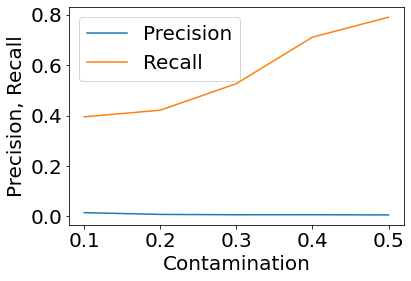

In [21]:
fig, ax = plt.subplots()
ax.plot(contamination_values, precision_list, label='Precision')
ax.plot(contamination_values, recall_list, label='Recall')
ax.legend()
ax.set_xlabel('Contamination')
ax.set_ylabel('Precision, Recall')
plt.show()

Recall value is increasing with contamination and that means, more and more points are being classified as outliers and classed as fraudulent. And as more and more cases are marked as outliers, number of actual outliers also would increase. Recall value of 1 means all actual outliers are correctly identified. And zero means none. 

However, as the Recall increase, model is classifying more samples as outliers which are not originally outliers. This should bring the precision down. And it does so slightly in the above plot. 

One should consider both recall and precision and look for an optimal balance as required by the business problem. 

**Question 8:**

Although the valid range of `contamination` parameter is (0.0, 0.5] so we can flag up to half of observations as outliers, it usually doesn't make sense to flag half the observations as outliers, since outliers are very rare.  Based on your answer in question 4 that shows that in this case, the fraudulent transactions are indeed rare, let's check `contimation` only up to 0.1 (we will flag maximum 10% of transactions as fraudulent).
  - Try passing different values to the parameter `contamination` of LocalOutlierFactor in range (0.0, 0.1].
  - Plot the `contamination` parameter on the X axis and both `precision` and `recall` on the Y axis of the same graph.
  - Plot on the same graph a vertical line for contamination (% of transactions flagged as fraudulent) that was found by LocalOutlierFactor with default parameters (question 5).
  
  

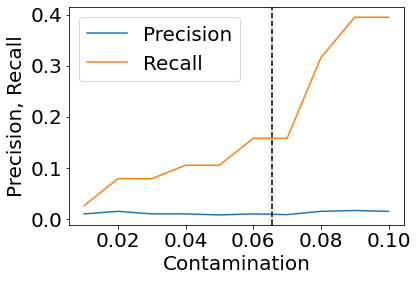

In [22]:
# your code here

contamination_values = [i/100 for i in range(1,11)]

precision_list_lof = []
recall_list_lof = []

for contamination in contamination_values:
#     print('for contamination param = ', contamination)
    lof = LocalOutlierFactor(contamination=contamination)
    y_pred = lof.fit_predict(scaled_X)

#     print(y_pred)
#     print(pd.DataFrame(y_pred).value_counts()[-1])
#     print(round(pd.DataFrame(y_pred).value_counts(normalize=True)[-1]*100,2), "%")

    y_true = y.values

    #converting the outlier scores to class labels . Fraud =1 and non-fraud =0
    y_pred = [0 if x == 1 else 1 for x in y_pred]

    precision_list_lof.append(precision_score(y_true, y_pred))
    recall_list_lof.append(recall_score(y_true, y_pred))
    

fig, ax = plt.subplots()
ax.plot(contamination_values, precision_list_lof, label='Precision')
ax.plot(contamination_values, recall_list_lof, label='Recall')
ax.legend()
ax.set_xlabel('Contamination')
ax.set_ylabel('Precision, Recall')
ax.axvline(lof_percent[0]/100, color='k', linestyle='--')
plt.show()

**Question 9:** Repeat questions 5-8 using `sklearn.ensemble.IsolationForest`.

  - Would you say that the `contamination` chosen by default is a good choice?
  - If you would go with a higher `contamination` value, what value would you choose and why?
  - If you would go with a lower `contamination` value, what value would you choose and why?

- Yes, indeed. Contamination chosen by the default was very apt, because we can see that the precision started increasing after this level of contamination which would have resulted in more numbers of samples would have been branded as outliers. 


- In such case as this one, it is better to trade off for higher recall than precision. More samples will be classed as outliers and eventually branded as fraudulent. Where the user will alerted or the the transactions cancelled. It may cause a bit of distaste to the client, but not losing the money/wealth takes precedence over trvial concerns. In this case I will go for a max value of 0.5 as contamination values. 


- If the goal of the business case is to minimise the recalls.  (like detecting defective products in manufacturing), it is better to go for a lower recall threshold. I would chose, the default setting as in this assignment, which would have  given a decent result. 

# IsolationForest

In [23]:
# your code here
from sklearn.ensemble import IsolationForest


iso = IsolationForest()
outlier_scores = iso.fit_predict(scaled_X)

print(outlier_scores)
print(pd.DataFrame(outlier_scores).value_counts()[-1])
lof_percent = (round(pd.DataFrame(outlier_scores).value_counts(normalize=True)[-1]*100,2), "%")
print(lof_percent)


# your code here


from sklearn.metrics import confusion_matrix, classification_report

y_true = y.values
y_pred = outlier_scores

#converting the outlier scores to class labels . Fraud =1 and non-fraud =0
y_pred = [0 if x == 1 else 1 for x in y_pred]

# calculate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# calculate the classification report
cr = classification_report(y_true, y_pred)
print("\nClassification Report:")
print(cr)

[1 1 1 ... 1 1 1]
380
(3.8, '%')
Confusion Matrix:
[[9617  345]
 [   3   35]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      9962
           1       0.09      0.92      0.17        38

    accuracy                           0.97     10000
   macro avg       0.55      0.94      0.57     10000
weighted avg       1.00      0.97      0.98     10000



Q4 -  0.38 %   (Random)
Q9 with ISOFOREST(Q5) -  4.55 %   (LOF) 

Iso methodolgy is better. 

ISo is a density-based outlier detection method which calculated the outlier score for each sample. 
(score: maesaue of how isolated each sample is). High outlier score are considered as  outliers. 
The core of the algorithm is to “isolate” outliers by creating decision trees over random attributes. 
The random partitioning produces noticeable shorter paths for outliers since:

 - fewer instances (of outliers) result in smaller partitions
 - distinguishable attribute values are more likely to be separated in early partitioning
Hence, when a forest of random trees collectively produces shorter path lengths for some particular points, then they are highly likely to be outliers.

And on the other hand, the percentage of real outliers that would be chosen would depend on the proportion of real outliers in the dataset and size of sample. And if the number of outliers are few, percentage of real outliers chosen will be low, which means poor model. 

Also, random selection of outliers, does not consider any underlying pattern or density or anything. 


So ISO method is anytime better than choosing the outliers randomly. 


**Question 10 - Q7:**

`contamination` parameter of `IsoForest` allows us to set what percent of total observations we would like our iso model to flag as an outlier.  Let's see how the `contamination` parameter effects the results of LOF:
  - Try passing different valid values to the parameter `contamination` of IsoForest on full valid range of `contamination` of (0.0, 0.5].
  - Plot the `contamination` parameter on the X axis and both `precision` and `recall` on the Y axis of the same graph.
  - How does the `contamination` parameter affect the precision and recall of LOF?

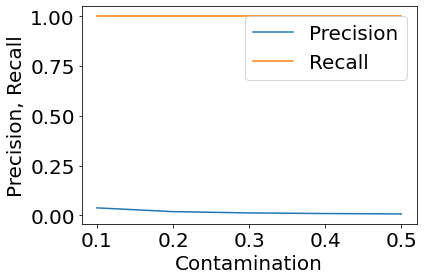

In [24]:
# your code here

contamination_values = [0.1, 0.2, 0.3, 0.4, 0.5]

precision_list = []
recall_list = []

for contamination in contamination_values:
#     print('for contamination param = ', contamination)
    iso = IsolationForest(contamination=contamination)
    y_pred = iso.fit_predict(scaled_X)

#     print(y_pred)
#     print(pd.DataFrame(y_pred).value_counts()[-1])
#     print(round(pd.DataFrame(y_pred).value_counts(normalize=True)[-1]*100,2), "%")

    y_true = y.values

    #converting the outlier scores to class labels . Fraud =1 and non-fraud =0
    y_pred = [0 if x == 1 else 1 for x in y_pred]

    precision_list.append(precision_score(y_true, y_pred))
    recall_list.append(recall_score(y_true, y_pred))
    

fig, ax = plt.subplots()
ax.plot(contamination_values, precision_list, label='Precision')
ax.plot(contamination_values, recall_list, label='Recall')
ax.legend()
ax.set_xlabel('Contamination')
ax.set_ylabel('Precision, Recall')
# ax.axvline(lof_percent[0]/100, color='k', linestyle='--')
plt.show()

In this model of IsoForest, it seems that the contaminatin param has no effect on the precision. Because, to begin with Precision was already very high. 

**Question 10 - Q8:**

Although the valid range of `contamination` parameter is (0.0, 0.5] so we can flag up to half of observations as outliers, it usually doesn't make sense to flag half the observations as outliers, since outliers are very rare.  Based on your answer in question 4 that shows that in this case, the fraudulent transactions are indeed rare, let's check `contimation` only up to 0.1 (we will flag maximum 10% of transactions as fraudulent).
  - Try passing different values to the parameter `contamination` of IsoForest in range (0.0, 0.1].
  - Plot the `contamination` parameter on the X axis and both `precision` and `recall` on the Y axis of the same graph.
  - Plot on the same graph a vertical line for contamination (% of transactions flagged as fraudulent) that was found by LocalOutlierFactor with default parameters (question 5).
  
  

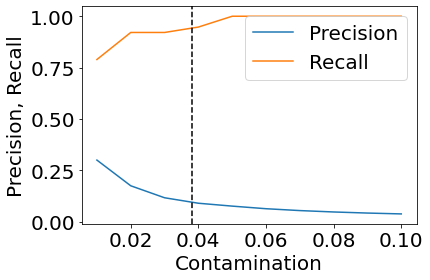

In [25]:
contamination_values = [i/100 for i in range(1,11)]

precision_list_iso = []
recall_list_iso = []


for contamination in contamination_values:
#     print('for contamination param = ', contamination)
    iso = IsolationForest(contamination=contamination)
    y_pred = iso.fit_predict(scaled_X)

#     print(y_pred)
#     print(pd.DataFrame(y_pred).value_counts()[-1])
#     print(round(pd.DataFrame(y_pred).value_counts(normalize=True)[-1]*100,2), "%")

    y_true = y.values

    #converting the outlier scores to class labels . Fraud =1 and non-fraud =0
    y_pred = [0 if x == 1 else 1 for x in y_pred]

    precision_list_iso.append(precision_score(y_true, y_pred))
    recall_list_iso.append(recall_score(y_true, y_pred))
    

fig, ax = plt.subplots()
ax.plot(contamination_values, precision_list_iso, label='Precision')
ax.plot(contamination_values, recall_list_iso, label='Recall')
ax.legend()
ax.set_xlabel('Contamination')
ax.set_ylabel('Precision, Recall')
ax.axvline(lof_percent[0]/100, color='k', linestyle='--')
plt.show()

- Would you say that the `contamination` chosen by default is a good choice?
  - If you would go with a higher `contamination` value, what value would you choose and why?
  - If you would go with a lower `contamination` value, what value would you choose and why?

- Yes, indeed the default one is good. 
- I would choose 0.06 as contamination because, the precisin has hit 1 at this level. 
- Depending upon the business case, I will choose and her i will go for 0.02


**Question 10:** 
- Plot contamination, precision and recall both for LOF and IF on the same graph for contaminations in range (0, 0.1].  **Tip:** use different colors for precision and recall, and different line styles to differentiate between LOF and IF.
- What algorithm gives us consistently better results?
- What algorithm and what contamination value would you choose and why? If you are not sure, give a few options.

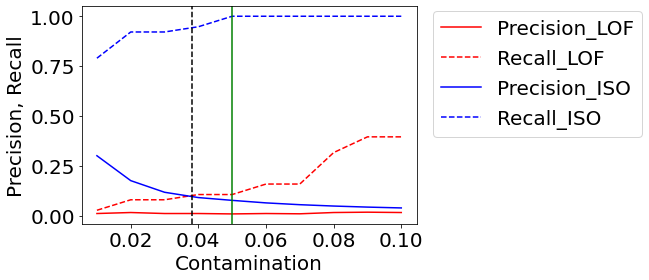

In [39]:
# your code here


fig, ax = plt.subplots()

ax.plot(contamination_values, precision_list_lof, 'r-' ,label='Precision_LOF')
ax.plot(contamination_values, recall_list_lof, 'r--',label='Recall_LOF')

ax.plot(contamination_values, precision_list_iso, 'b-', label='Precision_ISO')
ax.plot(contamination_values, recall_list_iso, 'b--' ,label='Recall_ISO')
plt.legend(loc=(1.05,.4))
ax.set_xlabel('Contamination')
ax.set_ylabel('Precision, Recall')
ax.axvline(lof_percent[0]/100, color='k', linestyle='--')

ax.axvline(0.05, color='g', linestyle='-')

plt.show()

- Isolation forest algorthm is quite consistent with performance. Variablity of the precision and recall is lesser than that of the LOF. 

- I would choose Isolation Forest, contamination=0.05 as (marked in green). I chose this because Isolation alorithm is quite consstent and contamination =0.5 , it has reached a max recall. . No point going for a higher contamination. 